<a href="https://colab.research.google.com/github/lanyu0322/phd_semester1/blob/master/NYC_MERGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#connecting google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [0]:
#useful imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlwt
import xlrd
import os, sys

In [0]:
filenames = ['drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_staten_island/island_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_queens/queens_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_manhattan/manhattan_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_brooklyn/brooklyn_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_bronx/bronx_stops.txt']

In [0]:
with open('drive/My Drive/lwir/data/NYC_busstop_merge/merge_stops.txt','w') as outfile:
  for fname in filenames:
    with open(fname) as infile:
      outfile.write(infile.read())

In [0]:
with open('drive/My Drive/lwir/data/NYC_busstop_merge/merge_stops.txt','r') as f:
  lines = f.readlines()
  
  line_num = len(lines)
  print(lines)
  print(line_num)

['stop_id,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station\n', '200001,"GOETHALS RD N/ADMIN PARKING LOT",,  40.628713, -74.182687,,,0,\n', '200008,"RICHMOND TER/SOUTH AV",,  40.640108, -74.165755,,,0,\n', '200009,"RICHMOND TER/POST LA",,  40.639539, -74.164417,,,0,\n', '200010,"RICHMOND TER/ANDROS AV",,  40.637910, -74.162089,,,0,\n', '200011,"RICHMOND TER/HARBOR RD",,  40.636990, -74.159932,,,0,\n', '200013,"RICHMOND TER/VAN PELT AV",,  40.636747, -74.154887,,,0,\n', '200014,"RICHMOND TER/DAVIS AV",,  40.644712, -74.110734,,,0,\n', '200015,"RICHMOND TER/LAKE AV",,  40.637017, -74.150200,,,0,\n', '200016,"RICHMOND TER/HOUSEMAN AV",,  40.637272, -74.148716,,,0,\n', '200017,"RICHMOND TER/GRANITE AV",,  40.637568, -74.146753,,,0,\n', '200018,"RICHMOND TER/MORNINGSTAR RD",,  40.637856, -74.144927,,,0,\n', '200019,"RICHMOND TER/JOHN ST",,  40.638954, -74.142353,,,0,\n', '200020,"RICHMOND TER/NICHOLAS AV",,  40.639616, -74.139389,,,0,\n', '200021,"RICHMOND 

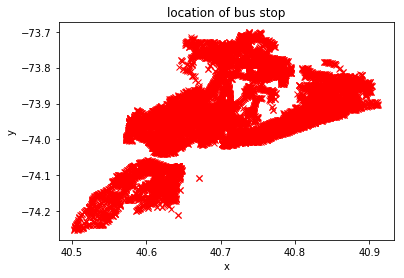

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

x = []
y = []

def plotData(x, y):

    pylab.figure(1)

    pylab.plot(x, y, 'rx')
    pylab.xlabel('x')
    pylab.ylabel('y')

    pylab.show()

x_axis = open("drive/My Drive/lwir/data/NYC_busstop_merge/merge_stops.txt")
y_axis = open("drive/My Drive/lwir/data/NYC_busstop_merge/merge_stops.txt")
      
  
# 1. 有错误的时候，你要看提示，刚才他写着cannot convert string to float “stop_lat”， 你就要看stop_lat是在哪里的，结果你发现是数据里的标题， 于是你打开数据文件，搜了一下这个词，发现在文件里有5行都是这个非数字的标题
# 2. 你就要知道不能把这种非数字的传入你的画图程序里，所以你参照之前的方法，在for 语句后面加上了判断，至于for 语句语法是什么样的，还请你自己学习一下，不要一知半解
# 3. 你还要判断有时候某一行的latidute或者longitude为空字符串'', 所以你也要把这一行去掉，因为你前面用了float('xxxx')去吧这个string转成float浮点数，所以空字符串''是没法转成float的，有了后面这个and语句
# 4. strip()方法是啥，还请你自己查一下，查查为什么要用strip处理一下
# 5. 然后你就可以照搬之前的东东来画图啦 ^_^
x = [float(l.split(',')[3].strip()) for l in x_axis if (l.split(',')[0].strip() != 'stop_id' and l.split(',')[3].strip() != '' and float(l.split(',')[3].strip()))]
y = [float(l.split(',')[4].strip()) for l in y_axis if (l.split(',')[0].strip() != 'stop_id' and l.split(',')[3].strip() != '' and float(l.split(',')[4].strip()))]



# print(x)
plt.title('location of bus stop')
plotData(x,y)

In [0]:
print(x)

In [0]:
#connecting google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


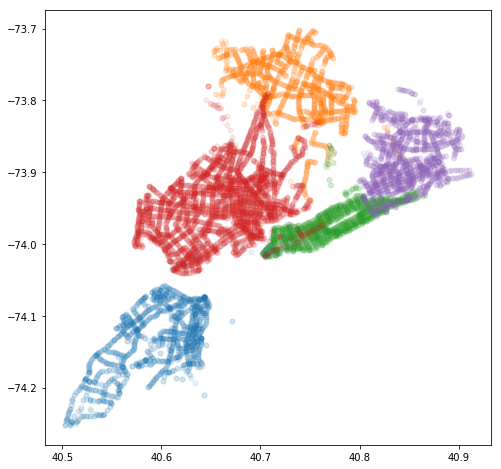

In [0]:

fname = "drive/My Drive/lwir/data/NYC_busstop_merge/merge_stops.txt"
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(fname)

filenames = ['drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_staten_island/island_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_queens/queens_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_manhattan/manhattan_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_brooklyn/brooklyn_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_bronx/bronx_stops.txt']
datas = []

for fname in filenames:
  datas.append(pd.read_csv(fname))
  data = pd.concat(datas)
  
  
lat = data["stop_lat"].values
lon = data["stop_lon"].values
plt.figure(figsize=(8, 8))
plt.plot(datas[0]["stop_lon"], datas[0]["stop_lat"], "o", ms=5, alpha=0.1)
plt.plot(datas[1]["stop_lon"], datas[1]["stop_lat"], "o", ms=5, alpha=0.1)
plt.plot(datas[2]["stop_lon"], datas[2]["stop_lat"], "o", ms=5, alpha=0.1)
plt.plot(datas[3]["stop_lon"], datas[3]["stop_lon"], "o", ms=5, alpha=0.1)
plt.plot(datas[4]["stop_lon"], datas[4]["stop_lon"], "o", ms=5, alpha=0.1)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


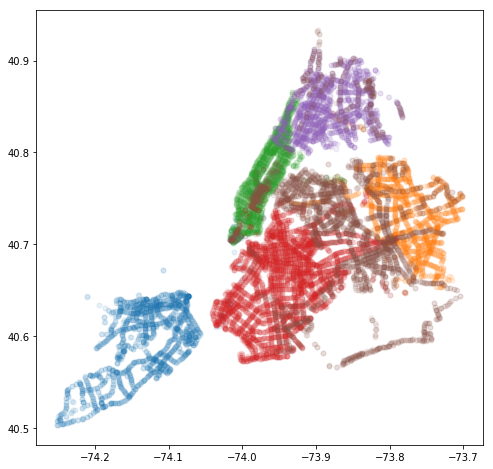

In [0]:
fname = "drive/My Drive/lwir/data/NYC_busstop_merge/merge_stops.txt"
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(fname)
filenames = ['drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_staten_island/island_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_queens/queens_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_manhattan/manhattan_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_brooklyn/brooklyn_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_bronx/bronx_stops.txt','drive/My Drive/lwir/data/NYC_busstop_download/stops.txt']
datas = []

for fname in filenames:
  datas.append(pd.read_csv(fname))
  data = pd.concat(datas)
lat = data["stop_lat"].values
lon = data["stop_lon"].values
plt.figure(figsize=(8, 8))
plt.plot(datas[0]["stop_lon"], datas[0]["stop_lat"], "o", ms=5, alpha=0.1)
plt.plot(datas[1]["stop_lon"], datas[1]["stop_lat"], "o", ms=5, alpha=0.1)
plt.plot(datas[2]["stop_lon"], datas[2]["stop_lat"], "o", ms=5, alpha=0.1)
plt.plot(datas[3]["stop_lon"], datas[3]["stop_lat"], "o", ms=5, alpha=0.1)
plt.plot(datas[4]["stop_lon"], datas[4]["stop_lat"], "o", ms=5, alpha=0.1)
plt.plot(datas[5]["stop_lon"], datas[5]["stop_lat"], "o", ms=5, alpha=0.1)
# it has the alert below, is this because the data frame is different? 

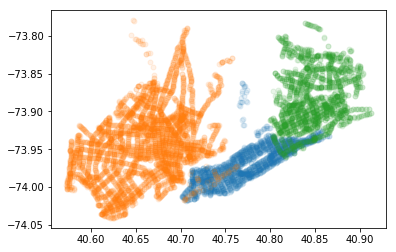

In [0]:
plt.plot(datas[2]["stop_lat"], datas[2]["stop_lon"], "o", ms=5, alpha=0.1)
plt.plot(datas[3]["stop_lat"], datas[3]["stop_lon"], "o", ms=5, alpha=0.1)
plt.plot(datas[4]["stop_lat"], datas[4]["stop_lon"], "o", ms=5, alpha=0.1)

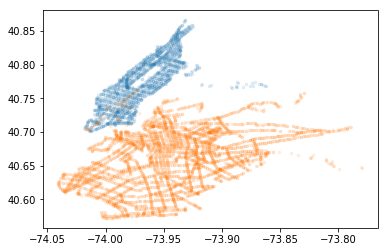

In [0]:
plt.plot(datas[2]["stop_lon"], datas[2]["stop_lat"], ".", ms=5, alpha=0.1)
plt.plot(datas[3]["stop_lon"], datas[3]["stop_lat"], ".", ms=5, alpha=0.1)

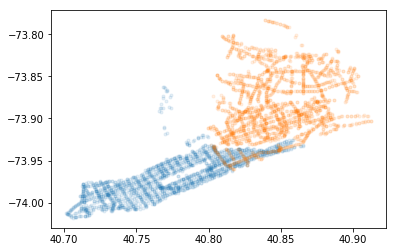

In [0]:
plt.plot(datas[2]["stop_lat"], datas[2]["stop_lon"], ".", ms=6, alpha=0.1)
plt.plot(datas[4]["stop_lat"], datas[4]["stop_lon"], ".", ms=6, alpha=0.1)

In [0]:
#useful imports
import folium
import pandas as pd
#define the world map
world_map = folium.Map()
#nyc latitude and longitude values
latitude = 40.76
longitude = -74
nyc_map = folium.Map(location=[latitude,longitude],zoom_start=12)
nyc_map
busstop_data = pd.read_csv('drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_staten_island/island_stops.txt')
len(busstop_data)
busstop_island = folium.map.FeatureGroup()

for lat, lng in zip(busstop_data.stop_lat,busstop_data.stop_lon):
  busstop_island.add_child(
      folium.CircleMarker(
          [lat, lng],
          radius=4,
          color='yellow',
          fill=True,
          fill_color='red',
          fill_opacity=0.4
      )
  )
  
nyc_map=folium.Map(location=[latitude,longitude], zoom_start=12)
nyc_map.add_child(busstop_island)




In [0]:
import folium
# boundary of the image on the map
min_lon = -74.2
max_lon = -73.7
min_lat = 40.4
max_lat = 41.0
# create the map
map = folium.Map(location=[40.76, -74], zoom_start = 8)
busstop_datam = pd.read_csv('drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_queens/queens_stops.txt')
busstop_m = folium.map.FeatureGroup()

for lat, lng in zip(busstop_datam.stop_lat,busstop_datam.stop_lon):
  busstop_m.add_child(
      folium.CircleMarker(
          [lat, lng],
          radius=4,
          color='yellow',
          fill=True,
          fill_color='red',
          fill_opacity=0.4,
          bounds =[[min_lat, min_lon], [max_lat, max_lon]],\
        attr = 'busstopM')
      )
  
busstop_m.layer_name = 'busstopM'
map.add_child(busstop_m)
# if you do not want to let it included in the for statement,  aligh it with the for statement （对齐上面的for，如果不是想写在for循环里面）

folium.LayerControl().add_to(map)# i am trying to change the base layer, but seems not that useful, is there another way to do it?


In [37]:
#======================================Merge data from nyc bus company and nyc transite bus
  
 #useful imports
import folium
import pandas as pd
from folium.plugins import FastMarkerCluster
#define the world map
world_map = folium.Map()
#nyc latitude and longitude values
latitude = 40.76
longitude = -74
nyc_map = folium.Map(location=[latitude,longitude],zoom_start=12)
nyc_map


busstop_nyc = folium.map.FeatureGroup()


filenames = ['drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_staten_island/island_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_queens/queens_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_manhattan/manhattan_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_brooklyn/brooklyn_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_bronx/bronx_stops.txt','drive/My Drive/lwir/data/NYC_busstop_download/stops.txt']


datas = []


for fname in filenames:
  datas.append(pd.read_csv(fname))
  data = pd.concat(datas)

busstop_nyc = folium.map.FeatureGroup()

busstop_nyc.add_child(FastMarkerCluster(data[["stop_lat", "stop_lon"]].values.tolist()))


i = 0



#so if we read this data file，it will not have the row that is not number
#this folium can not read that much data，so i just read the first 2000, is this my problem that can not read all of them?
# for lat, lng in zip(data.stop_lat,data.stop_lon):
#   if i > 3000: break 
#   busstop_nyc.add_child(
#       folium.CircleMarker(
#           [lat, lng],
#           radius=4,
#           color='yellow',
#           fill=True,
#           fill_color='red',
#           fill_opacity=0.5
#       )
#   )
#   i+=1


  
nyc_map=folium.Map(location=[latitude,longitude], zoom_start=12)
nyc_map.add_child(busstop_nyc)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [0]:
#======================================Merge data from nyc bus company and nyc transite bus
  
 #useful imports
import folium
import pandas as pd
#define the world map
world_map = folium.Map()
#nyc latitude and longitude values
latitude = 40.76
longitude = -74
nyc_map = folium.Map(location=[latitude,longitude],zoom_start=12)
nyc_map


busstop_nyc = folium.map.FeatureGroup()


#=====================================珊珊原始的部分
#busstop_data_nyc = pd.read_csv('drive/My Drive/lwir/data/NYC_busstop_merge/merge_stops.txt')
#load merge_stops.txt，这个文件是我们之前把好几个文件贴在一起的那个，还记得么，有好几行都有stop_id, stop_lat这些非数字的东西的
# for lat, lng in zip(busstop_data_nyc.stop_lat,busstop_data_nyc.stop_lon): 
# 这一行你要查zip是什么意思呀，查了之后发现是压缩，就是意思可能害怕数据过大，对不对，然后zip了什么呢，看括号里，发现是zip了我们加载（load）进来的busstop_data_nyc这个文件，也就是上面的那个merge的文件，里的stop.lat, 和stop_lon这两列
# 然后你就会想到，这两列里面，其实不完全是数字呀，因为前面说了，文件里不止第一行，文中还有好几行都是带有stop_id, stop_lat等等的非数字行对吧，所以你把它加到地图里去，肯定是出不来的对不对
# 所以你就要想该怎么办呢，结果你想到老师帮你做了个什么datas的一个区分，然后你就往上翻，看不懂没事，我们往下到大卫的部分：
#   busstop_nyc.add_child(
#       folium.CircleMarker(
#           [lat, lng],
#           radius=4,
#           color='yellow',
#           fill=True,
#           fill_color='red',
#           fill_opacity=0.5
#       )
#   )


#=====================================大卫的部分
#merge_file = "drive/My Drive/lwir/data/NYC_busstop_merge/merge_stops.txt"
# defint a 先定义一个变量名叫merge_file, 他的真实值是merge_stops.txt这个文件的地址，对吧
#data = pd.read_csv(merge_file)
# 然后定义一个变量名data， 他的值是真正read了上面这个地址的一个csv文件
filenames = ['drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_staten_island/island_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_queens/queens_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_manhattan/manhattan_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_brooklyn/brooklyn_stops.txt','drive/My Drive/lwir/data/NYC_busstop_merge/google_transit_bronx/bronx_stops.txt','drive/My Drive/lwir/data/NYC_busstop_download/stops.txt']
# 定义一个变量名（以下省略）叫filenames，它是一个数组，长度为6，因为里面有6个文件的地址
datas = []
# 定义一个空数组，名为datas

for fname in filenames:
  # 遍历filenames这个数组，fname = 它里面的一个个文件名字
  datas.append(pd.read_csv(fname))
  # 先看最里面的括号，pd.read_csv(fname)表示他打开了这个文件，真实值是这个文件的csv形式，然后看外面的括号datas.append(xxxx) 表示把这个csv文件放到这个datas数组里
  # 这样每循环到filenames里的一个文件名，他都会吧这个文件加到这个数组里，但是他跟之前我们的merge文件不同，merge文件是把好多个文件粘贴在一起，而这里是每次给数组的尾部增添（append）一个新元素，这里这个元素就是每一个csv文件
  data = pd.concat(datas)
  # 注意，这里concat我之前也不知道什么意思，然后查了一下，发现是把多个文件按照相同名字的列（colomn）整合在一起，参考：https://blog.csdn.net/stevenkwong/article/details/52528616
  # 举例：
#   a file is：
#             id，     name，   address
#              a        b         c
#              d        e         f
#   b file is：
#             id，     name，   address
#              aa       bb        cc
#              dd       ee        ff
#   c file is：
#             id，     name，   address
#             aaa      bbb       ccc
#             ddd      eee       fff
        
#   in this way, data = pd.concat(a, b, c) becomes a file like：

  
#             id，     name，   address
#              a        b         c
#              d        e         f
#              aa       bb        cc
#              dd       ee        ff
#             aaa       bbb      ccc
#             ddd       eee      fff
#    in this way there is no duplication【data head(stop_id, stop_lat, etc)】
#    the file that i "merged" is like：
#             id，     name，   address
#              a        b         c
#              d        e         f
#             id，     name，   address
#              aa       bb        cc
#              dd       ee        ff
#             id，     name，   address
#             aaa       bbb      ccc
#             ddd       eee      fff


busstop_nyc = folium.map.FeatureGroup()

i = 0

#so if we read this data file，it will not have the row that is not number
#this folium can not read that much data，so i just read the first 2000, is this my problem that can not read all of them?
for lat, lng in zip(data.stop_lat,data.stop_lon):
  if i > 2000: break 
  busstop_nyc.add_child(
      folium.CircleMarker(
          [lat, lng],
          radius=4,
          color='yellow',
          fill=True,
          fill_color='red',
          fill_opacity=0.5
      )
  )
  i+=1


  
nyc_map=folium.Map(location=[latitude,longitude], zoom_start=12)
nyc_map.add_child(busstop_nyc)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [0]:
FastMarkerCluster?